# BasicTauHybridSolver

### Imports

In [1]:
import sys
import os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_tau_hybrid_solver import BasicTauHybridSolver

### Model Instantiation

Model must include rates, species, and reactions

In [2]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [3]:
model = MichaelisMenten()


### Run Model and plot

In [4]:
%time results = model.run(solver=BasicTauHybridSolver())

CPU times: user 3.58 s, sys: 0 ns, total: 3.58 s
Wall time: 3.79 s


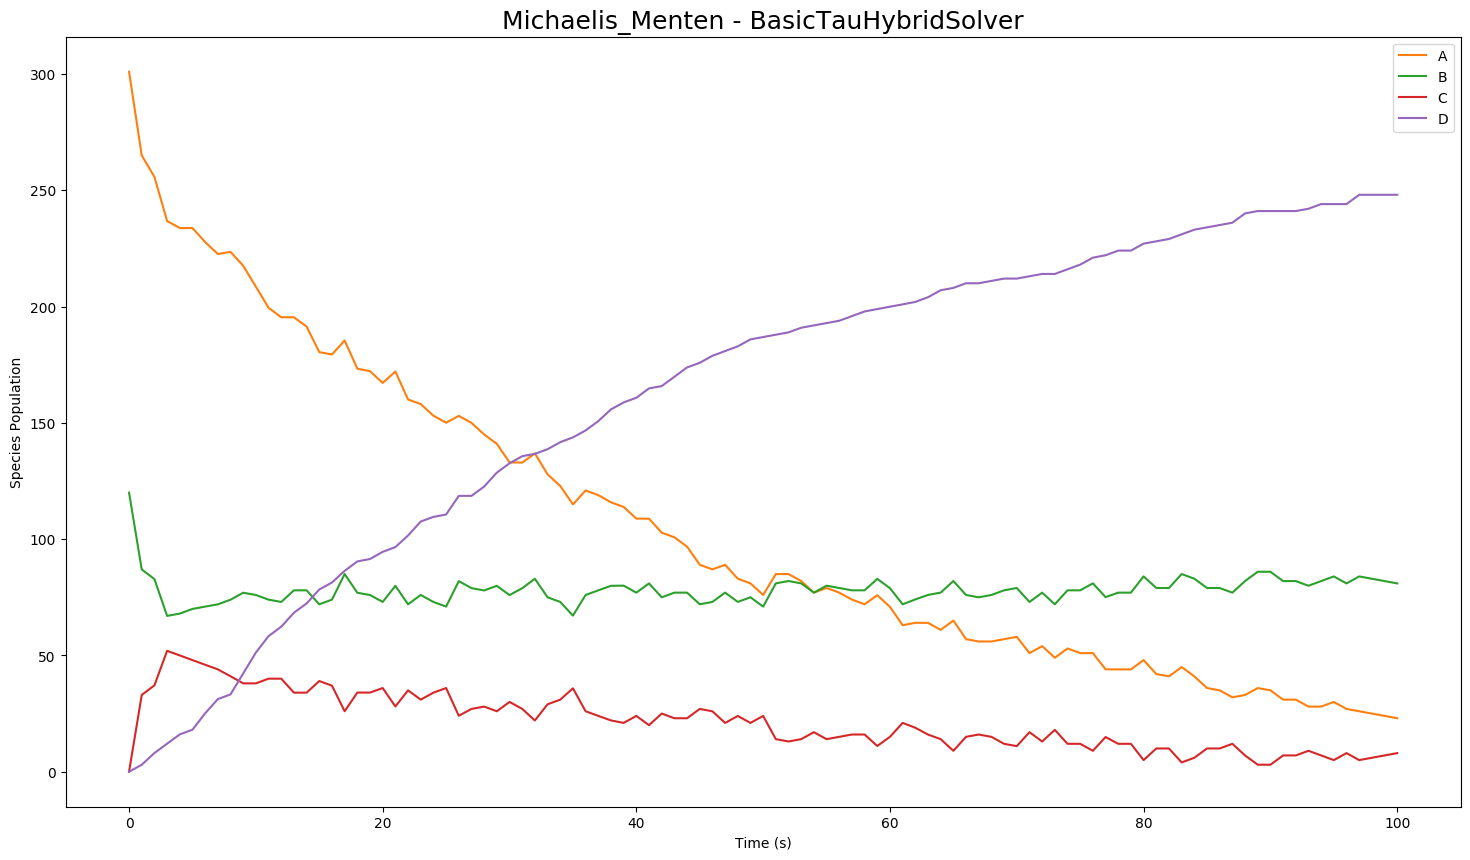

In [5]:
results.plot()

### Save to CSV

Creates a timestamped local directory and writes the results data to .csv files in that directory.

path is a vpath to the location your directory of csv files will be created (e.g. '/home/user/model_results' will create a directory of csv files in the home/user/model_results directory). Leave it out to default to the model's directory.

nametag is a string parameter to tag your directory and .csv files. Leave it out to default to the model name.

In [6]:
results.to_csv()

In [7]:
results.to_csv(path='.',nametag='sample_nametag')

In [12]:
print(os.path.isdir("./sample_nametag1583182196.986434"))

True
